In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
#class Measurement(Base):
#    __tablename__ = 'measurement'
#    id = Column(Integer, primary_key=True)
#    station = Column(String(255))
#    date = Column(String(255))
#    prcp = Column(Float)
#    tobs = Column(Float)
    
Station = Base.classes.station
#class Station(Base):
#    __tablename__ = 'station'
#    id = Column(Integer, primary_key=True)
#    station = Column(String(255))
#    name = Column(String(255))
#    latitude = Column(String(255))
#    longitude = Column(String(255))
#    elevation = Column(String(255))

In [225]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [226]:
# Find the most recent date in the data set.
data = engine.execute('SELECT date FROM measurement ORDER BY date DESC')
for days in data:
    print(days)

('2017-08-23',)
('2017-08-23',)
('2017-08-23',)
('2017-08-23',)
('2017-08-22',)
('2017-08-22',)
('2017-08-22',)
('2017-08-21',)
('2017-08-21',)
('2017-08-21',)
('2017-08-21',)
('2017-08-20',)
('2017-08-20',)
('2017-08-20',)
('2017-08-19',)
('2017-08-19',)
('2017-08-19',)
('2017-08-19',)
('2017-08-18',)
('2017-08-18',)
('2017-08-18',)
('2017-08-18',)
('2017-08-17',)
('2017-08-17',)
('2017-08-17',)
('2017-08-17',)
('2017-08-16',)
('2017-08-16',)
('2017-08-16',)
('2017-08-16',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-15',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-14',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-13',)
('2017-08-12',)
('2017-08-12',)
('2017-08-12',)
('2017-08-11',)
('2017-08-11',)
('2017-08-11',)
('2017-08-11',)
('2017-08-10',)
('2017-08-10',)
('2017-08-10',)
('2017-08-10',)
('2017-08-09',)
('2017-08-09',)
('2017-08-09',)
('2017-08-08',)
('2017-08-08',)
('2017-08-08',)
('2017-0

('2015-12-27',)
('2015-12-26',)
('2015-12-26',)
('2015-12-26',)
('2015-12-26',)
('2015-12-26',)
('2015-12-25',)
('2015-12-25',)
('2015-12-25',)
('2015-12-25',)
('2015-12-25',)
('2015-12-25',)
('2015-12-24',)
('2015-12-24',)
('2015-12-24',)
('2015-12-24',)
('2015-12-24',)
('2015-12-24',)
('2015-12-23',)
('2015-12-23',)
('2015-12-23',)
('2015-12-23',)
('2015-12-23',)
('2015-12-23',)
('2015-12-22',)
('2015-12-22',)
('2015-12-22',)
('2015-12-22',)
('2015-12-22',)
('2015-12-22',)
('2015-12-21',)
('2015-12-21',)
('2015-12-21',)
('2015-12-21',)
('2015-12-20',)
('2015-12-20',)
('2015-12-20',)
('2015-12-20',)
('2015-12-20',)
('2015-12-19',)
('2015-12-19',)
('2015-12-19',)
('2015-12-19',)
('2015-12-19',)
('2015-12-19',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-18',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-17',)
('2015-12-16',)
('2015-12-16',)
('2015-12-16',)
('2015-1

('2014-07-26',)
('2014-07-26',)
('2014-07-25',)
('2014-07-25',)
('2014-07-25',)
('2014-07-25',)
('2014-07-25',)
('2014-07-25',)
('2014-07-25',)
('2014-07-24',)
('2014-07-24',)
('2014-07-24',)
('2014-07-24',)
('2014-07-24',)
('2014-07-24',)
('2014-07-24',)
('2014-07-24',)
('2014-07-23',)
('2014-07-23',)
('2014-07-23',)
('2014-07-23',)
('2014-07-23',)
('2014-07-23',)
('2014-07-23',)
('2014-07-23',)
('2014-07-22',)
('2014-07-22',)
('2014-07-22',)
('2014-07-22',)
('2014-07-22',)
('2014-07-22',)
('2014-07-22',)
('2014-07-22',)
('2014-07-21',)
('2014-07-21',)
('2014-07-21',)
('2014-07-21',)
('2014-07-21',)
('2014-07-21',)
('2014-07-21',)
('2014-07-21',)
('2014-07-20',)
('2014-07-20',)
('2014-07-20',)
('2014-07-20',)
('2014-07-20',)
('2014-07-20',)
('2014-07-20',)
('2014-07-19',)
('2014-07-19',)
('2014-07-19',)
('2014-07-19',)
('2014-07-19',)
('2014-07-19',)
('2014-07-19',)
('2014-07-18',)
('2014-07-18',)
('2014-07-18',)
('2014-07-18',)
('2014-07-18',)
('2014-07-18',)
('2014-07-18',)
('2014-0

('2013-04-02',)
('2013-04-02',)
('2013-04-02',)
('2013-04-02',)
('2013-04-02',)
('2013-04-02',)
('2013-04-01',)
('2013-04-01',)
('2013-04-01',)
('2013-04-01',)
('2013-04-01',)
('2013-04-01',)
('2013-04-01',)
('2013-04-01',)
('2013-03-31',)
('2013-03-31',)
('2013-03-31',)
('2013-03-31',)
('2013-03-31',)
('2013-03-30',)
('2013-03-30',)
('2013-03-30',)
('2013-03-30',)
('2013-03-30',)
('2013-03-30',)
('2013-03-29',)
('2013-03-29',)
('2013-03-29',)
('2013-03-29',)
('2013-03-29',)
('2013-03-29',)
('2013-03-29',)
('2013-03-28',)
('2013-03-28',)
('2013-03-28',)
('2013-03-28',)
('2013-03-28',)
('2013-03-28',)
('2013-03-28',)
('2013-03-28',)
('2013-03-27',)
('2013-03-27',)
('2013-03-27',)
('2013-03-27',)
('2013-03-27',)
('2013-03-27',)
('2013-03-27',)
('2013-03-26',)
('2013-03-26',)
('2013-03-26',)
('2013-03-26',)
('2013-03-26',)
('2013-03-26',)
('2013-03-25',)
('2013-03-25',)
('2013-03-25',)
('2013-03-25',)
('2013-03-25',)
('2013-03-25',)
('2013-03-24',)
('2013-03-24',)
('2013-03-24',)
('2013-0

('2011-11-07',)
('2011-11-07',)
('2011-11-07',)
('2011-11-07',)
('2011-11-06',)
('2011-11-06',)
('2011-11-06',)
('2011-11-06',)
('2011-11-06',)
('2011-11-05',)
('2011-11-05',)
('2011-11-05',)
('2011-11-05',)
('2011-11-05',)
('2011-11-05',)
('2011-11-05',)
('2011-11-04',)
('2011-11-04',)
('2011-11-04',)
('2011-11-04',)
('2011-11-04',)
('2011-11-04',)
('2011-11-04',)
('2011-11-04',)
('2011-11-04',)
('2011-11-03',)
('2011-11-03',)
('2011-11-03',)
('2011-11-03',)
('2011-11-03',)
('2011-11-03',)
('2011-11-03',)
('2011-11-03',)
('2011-11-02',)
('2011-11-02',)
('2011-11-02',)
('2011-11-02',)
('2011-11-02',)
('2011-11-02',)
('2011-11-02',)
('2011-11-01',)
('2011-11-01',)
('2011-11-01',)
('2011-11-01',)
('2011-11-01',)
('2011-11-01',)
('2011-11-01',)
('2011-10-31',)
('2011-10-31',)
('2011-10-31',)
('2011-10-31',)
('2011-10-31',)
('2011-10-31',)
('2011-10-31',)
('2011-10-31',)
('2011-10-30',)
('2011-10-30',)
('2011-10-30',)
('2011-10-30',)
('2011-10-30',)
('2011-10-30',)
('2011-10-30',)
('2011-1

('2010-07-01',)
('2010-07-01',)
('2010-07-01',)
('2010-07-01',)
('2010-07-01',)
('2010-07-01',)
('2010-07-01',)
('2010-07-01',)
('2010-06-30',)
('2010-06-30',)
('2010-06-30',)
('2010-06-30',)
('2010-06-30',)
('2010-06-30',)
('2010-06-30',)
('2010-06-30',)
('2010-06-30',)
('2010-06-29',)
('2010-06-29',)
('2010-06-29',)
('2010-06-29',)
('2010-06-29',)
('2010-06-29',)
('2010-06-29',)
('2010-06-29',)
('2010-06-29',)
('2010-06-28',)
('2010-06-28',)
('2010-06-28',)
('2010-06-28',)
('2010-06-28',)
('2010-06-28',)
('2010-06-28',)
('2010-06-28',)
('2010-06-28',)
('2010-06-27',)
('2010-06-27',)
('2010-06-27',)
('2010-06-27',)
('2010-06-27',)
('2010-06-27',)
('2010-06-26',)
('2010-06-26',)
('2010-06-26',)
('2010-06-26',)
('2010-06-26',)
('2010-06-26',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-25',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-06-24',)
('2010-0

One year from ('2017-08-23',) is 2016


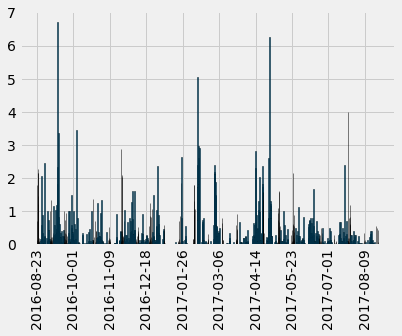

In [227]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
print(f'One year from {latest_date} is 2016')

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').\
            order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
mdf = pd.DataFrame(data)

# Sort the dataframe by date
mdf.set_index("date")

# Use Pandas Plotting with Matplotlib to plot the data
#fig = plt.figure(figsize = (12, 9))
x = mdf["date"]
y = mdf["prcp"]
plt.xticks(np.arange(0, 500, 39), rotation = 90)
plt.bar(x, y, edgecolor="black")
plt.xlabel = ("Date")
plt.ylabel = ("Percipitation")
plt.show()

In [228]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [229]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [230]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
i = func.count(Measurement.station)

popularity = session.query(Measurement.station, i).group_by(Measurement.station).order_by(i.desc()).all()
popularity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [231]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#engine.execute("SELECT * From Measurement WHERE station == 'USC00519281' ").fetchall()
mn = func.min(Measurement.tobs)
mx = func.max(Measurement.tobs)
ag = func.avg(Measurement.tobs)
session.query(mn, mx, ag).\
    filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

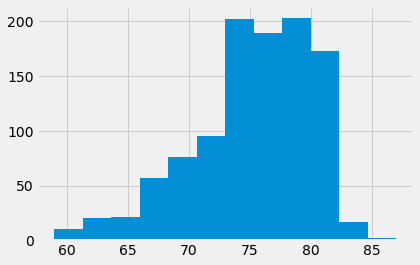

In [232]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data2 = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.station >= 'USC00519281').\
            filter(Measurement.date >= '2016-08-18').\
            order_by(Measurement.date).all()
tobs = pd.DataFrame(data2)
plt.hist(x=tobs['tobs'], bins=12)
plt.ylabel=("Frequency")
plt.xlabel=("Temperature")


# Close session

In [217]:
# Close Session
session.close()